In [1]:
library(tidyverse)
library(scales)
library(ggplot2)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
url1<-"https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
url2<-"https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

In [3]:
session_data <- read_csv(url1)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_data<-read_csv(url2)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#Data Wrangling:

In [12]:

session_data_wrangle<-session_data|>             
                      mutate(start_time=dmy_hm(start_time),
                      end_time=dmy_hm(end_time)
                    )|>
              filter(!is.na(start_time)&!is.na(end_time))|>
              mutate(Duration=as.numeric(end_time-start_time,unit="mins")
                    )|>
              group_by(hashedEmail)|>
              mutate(frequency = n(),
                     total_duration=sum(Duration,na.rm=TRUE)
                    ) |>
              ungroup()

players_data_wrangle<-players_data|>
                      select(-individualId,-organizationName)|>
                      mutate(experience = as.factor(experience),
                             subscribe = as.factor(subscribe),
                             gender = as.factor(gender))|>
                      filter(!is.na(experience) & !is.na(played_hours) & !is.na(age))



combined_data <- session_data_wrangle|>
  left_join(players_data_wrangle, by = "hashedEmail")



  
combined_data_1<-combined_data|>
               distinct(hashedEmail,start_time,.keep_all = TRUE)|>
               select(played_hours, name, gender, age,Duration,frequency, total_duration, experience, subscribe)|>
               distinct(name,.keep_all = TRUE)|>
               filter(age>=15&age<=30)|>
               select(-subscribe,total_duration)


combined_data_1

played_hours,name,gender,age,Duration,frequency,total_duration,experience
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<fct>
223.1,Hiroshi,Male,17,12,219,14671,Regular
53.9,Alex,Male,17,13,130,3873,Amateur
150.0,Delara,Female,16,23,159,9947,Amateur
56.1,Dana,Male,23,9,310,4795,Amateur
178.2,Piper,Female,19,17,147,11827,Regular
2.0,Ibrahim,Prefer not to say,27,18,8,168,Beginner
218.1,Akio,Non-binary,20,144,94,14132,Regular
32.0,Sidney,Male,22,10,79,2366,Amateur
1.4,Aiden,Prefer not to say,25,11,6,118,Veteran


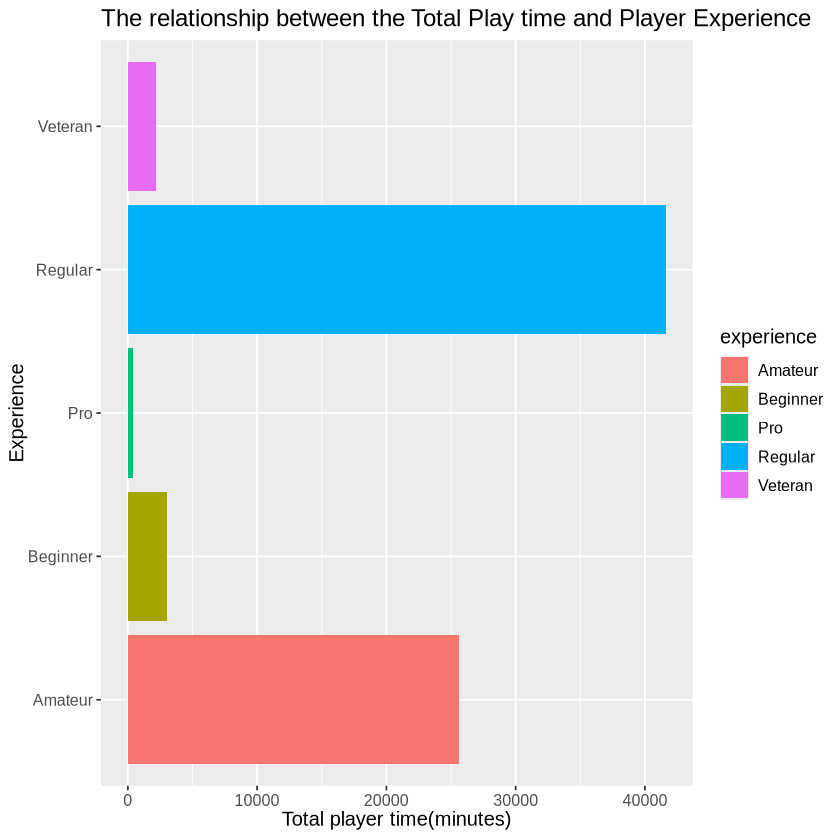

In [8]:
analysis_plot_1<-combined_data_1|>
               ggplot(aes(x=total_duration,y=experience,fill = experience))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the Total Play time and Player Experience",
                   y="Experience",
                   x="Total player time(minutes)"
               )+
               theme(text=element_text(size=12))
analysis_plot_1

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”


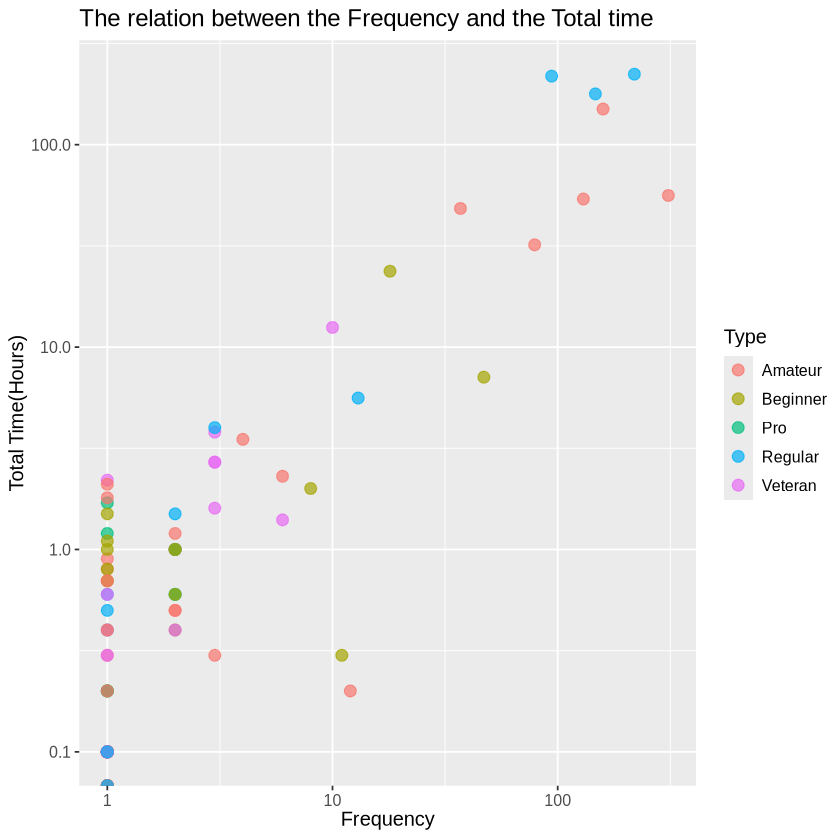

In [10]:

analysis_plot_2<-combined_data_1|>
               ggplot(aes(x=frequency,y=played_hours,colour = experience))+
               geom_point(size = 3, alpha = 0.7)+
               labs(
                   title="The relation between the Frequency and the Total time",
                   x="Frequency",
                   y="Total Time(Hours)",
                   colour="Type"
               )+
               scale_x_log10(labels=comma)+
               scale_y_log10(labels=comma)+
               theme(text=element_text(size=12))
analysis_plot_2

In [ ]:
analysis_plot_3<-combined_data_1|>
               ggplot(aes(x=age,y=played_hours,fill = gender))+
               geom_bar(stat="identity")+
               labs(
                   title="The relationship between the age and the Total time",
                   x="Age Group",
                   y="Total Time(Hours)",
                   fill="Type"
               )+
               theme(text=element_text(size=12))
analysis_plot_3